# Worksheet 3 - Filtering in the spatial domain (TPI.2)

#### Notes:
- The purpose of this worksheet is to implement the concepts learned in the Biomedical Image Processing - Filtering in the spatial domain 
- The resolution of the exercises of this practical work must be sent by email with the name "PIB_GroupNumber_TPI.2"
- The images to be used are available in the curricular unit's moodle - "Worksheet images"

In [1]:
# command to allow the display of image and plots in the notebook
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


**Question 1**: Read and visualize the "head_clean.png" image and its noisy versions "head_gaussian_noise.png" and "head_saltpepper_noise". You must view the images side by side (horizontally)

In [2]:
h_clean=imread('head_clean.png')
h_gaussian=imread('head_gaussian_noise.png')
h_saltpepper=imread('head_saltpepper_noise.png')
h_clean.shape

(411, 352)

In [3]:
h_saltpepper.dtype

dtype('float32')

In [4]:
#-Convert images to uint8
def convert_to_uint8(img):
    return np.round(img*255).astype(np.uint8)

In [5]:
h_clean8=convert_to_uint8(h_clean)
h_gaussian8=convert_to_uint8(h_gaussian)
h_saltpepper8=convert_to_uint8(h_saltpepper)

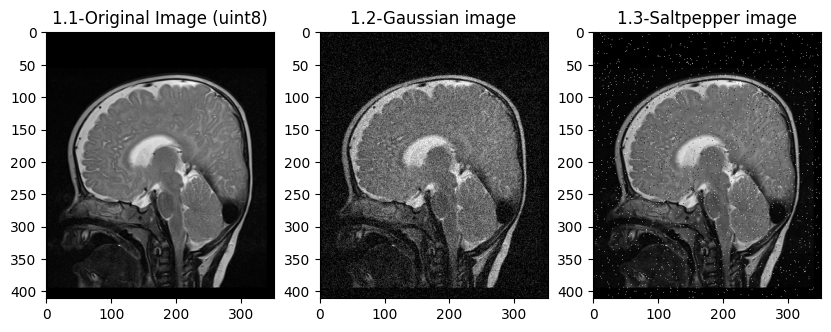

In [6]:
fig, (img1, img2, img3)=matplotlib.pylab.subplots(1,3,figsize=(10,8))

gray()
img1.imshow(h_clean8)
img1.title.set_text('1.1-Original Image (uint8)')
img2.imshow(h_gaussian8)
img2.title.set_text('1.2-Gaussian image')
img3.imshow(h_saltpepper8)
img3.title.set_text('1.3-Saltpepper image')

**Question 2**: Build a function to remove noise from the image "head_gaussian_noise.png" using the average filter. You must use neighborhood averaging to obtain the filtered image (not using the kernel convolution concept). Try it for the 3x3, 5x5, 9x9 neighborhood and comment the results.

In [7]:
def noise_redux(img,kr):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape

    #start new image
    imgT=np.zeros((w+p*2,h+p*2)) 

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #get mean neighbour
                aux=np.mean(neigh)
                #sum result
                imgT[i,j]=aux
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

Text(0.5, 1.0, '2.4-Noise reduction AVG(9x9)')

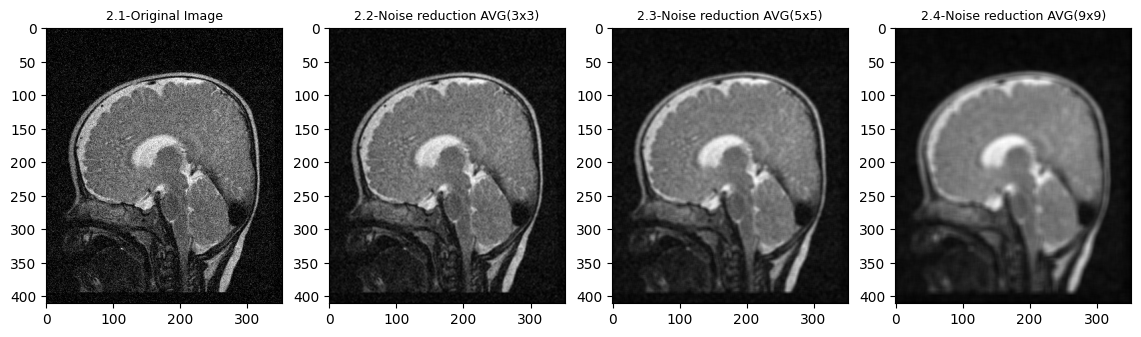

In [8]:
im_avg3=noise_redux(h_gaussian8,3)
im_avg5=noise_redux(h_gaussian8,5)
im_avg9=noise_redux(h_gaussian8,9)

fig, (img1, img2, img3, img4)=matplotlib.pylab.subplots(1,4,figsize=(14,10))

img1.imshow(h_gaussian8)
img1.set_title('2.1-Original Image', fontsize=9)
img2.imshow(im_avg3)
img2.set_title('2.2-Noise reduction AVG(3x3)', fontsize=9)
img3.imshow(im_avg5)
img3.set_title('2.3-Noise reduction AVG(5x5)', fontsize=9)
img4.imshow(im_avg9)
img4.set_title('2.4-Noise reduction AVG(9x9)', fontsize=9)

Na filtragem da imagem através da média, verifica-se que houve uma diminuição do ruído "fino". A variação do tamanho do kernel, provoca alteração da definição da imagem. Na imagem 2.2 a zona interior do crâneo apresenta menor ruído. Ao aumentar o tamnho do kernel, verifica-se que houve diminuição de ruído, mas também perda de definição da imagem (img 2.3). O kernel de maiores dimensões vai permitir que cada pixel seja alterado por uma vizinhança maior, ou seja vai ser alterado por informação de pixeis que eventualmente já estarão numa área pouco próxima ao pixel de interesse e, ainda assim, vão influenciar a sua intensidade.

**Question 3**: Build a function to remove noise from the image "head_saltpepper_noise.png" using the median filter. Try it for the 3x3, 5x5, 9x9 neighborhood and comment the results.

In [9]:
def noise_redux_median(img,kr): 
    p=int(floor(kr/2))
    
    #padding
    h_pad=np.pad(img,p)

    (w,h)=img.shape

    imgT=np.zeros((w+p*2,h+p*2))

    for i in range(p,w+p):
            for j in range(p,h+p):
                    neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                    #get neigh median
                    aux=median(neigh)
                    imgT[i,j]=aux
    imT= imgT[p:w+p,p:h+p]
    return imT

Text(0.5, 1.0, '3.4-Noise median red. 9x9')

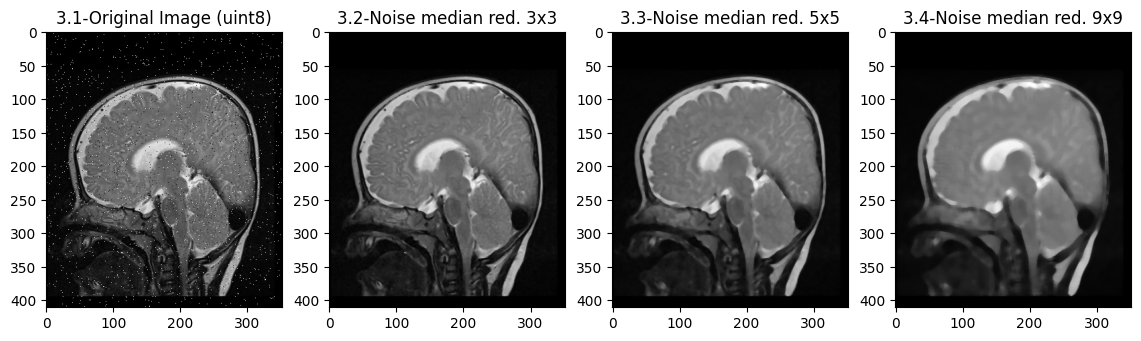

In [10]:
im3=noise_redux_median(h_saltpepper8,3)
im5=noise_redux_median(h_saltpepper8,5)
im9=noise_redux_median(h_saltpepper8,9)

fig, (img1, img2, img3, img4)=matplotlib.pylab.subplots(1,4,figsize=(14,10))
img1.imshow(h_saltpepper8)
img1.title.set_text('3.1-Original Image (uint8)')
img2.imshow(im3)
img2.set_title('3.2-Noise median red. 3x3')
img3.imshow(im5)
img3.set_title('3.3-Noise median red. 5x5')
img4.imshow(im9)
img4.set_title('3.4-Noise median red. 9x9')

Utilizando o filtro atavés da mediana, verifica-se uma diminuição do ruído do tipo saltpepper. Essa transformação é visível na imagem 3.2, comparativa à imagem 3.1. Ao aumentar o tamanho da vizinhança há perda de definição da imagem (img 3.4), uma vez que ao aumentar a vizinhança, cada pixel é influenciado por pixeis mais distantes e, portanto, menos relacionados com o próprio píxel.

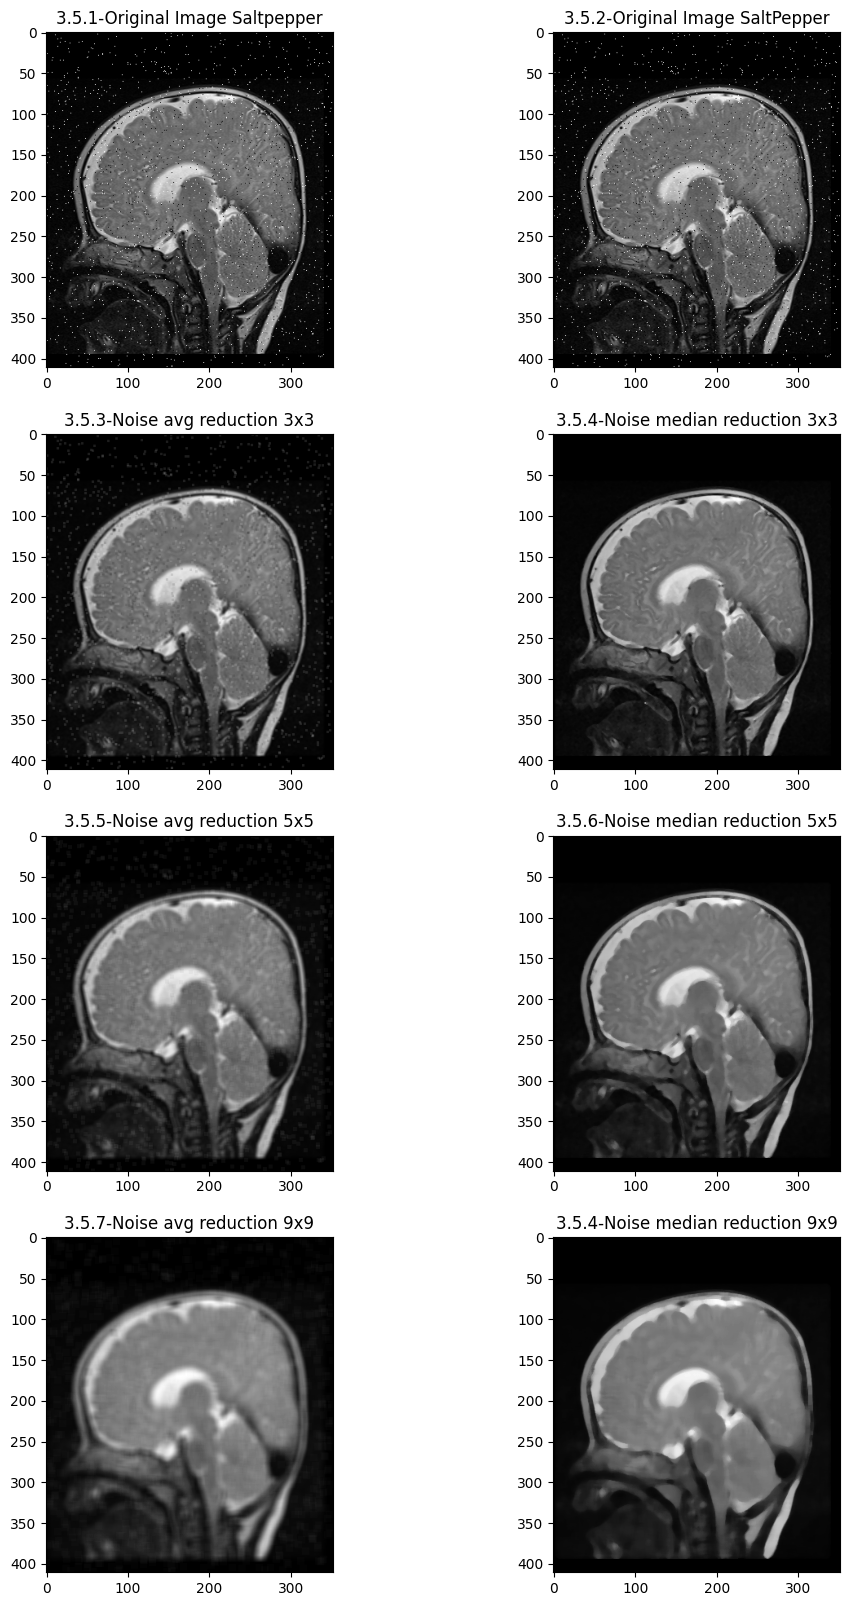

In [11]:
#comparar com média
im3mean=noise_redux(h_saltpepper8,3)
im5mean=noise_redux(h_saltpepper8,5)
im9mean=noise_redux(h_saltpepper8,9)


fig, ((img1, img2), (img3,img4),(img5,img6),(img7,img8))=matplotlib.pylab.subplots(4,2,figsize=(12,20))
img1.imshow(h_saltpepper8)
img1.title.set_text('3.5.1-Original Image Saltpepper')
img2.imshow(h_saltpepper8)
img2.title.set_text('3.5.2-Original Image SaltPepper')
img3.imshow(im3mean)
img3.title.set_text('3.5.3-Noise avg reduction 3x3')
img4.imshow(im3)
img4.title.set_text('3.5.4-Noise median reduction 3x3')
img5.imshow(im5mean)
img5.title.set_text('3.5.5-Noise avg reduction 5x5')
img6.imshow(im5)
img6.title.set_text('3.5.6-Noise median reduction 5x5')
img7.imshow(im9mean)
img7.title.set_text('3.5.7-Noise avg reduction 9x9')
img8.imshow(im9)
img8.title.set_text('3.5.4-Noise median reduction 9x9')

Nesta comparação observa-se que a utilização da filtragem através do método da mediana, funciona com imagens com ruído do tipo Saltpepper. Na coluna de imagens da direita, após ser aplicado o filtro mediana o ruido foi anulado com vizinhança 3x3 e a imagem perdeu definição com vizinhança maior. Na coluna de imagens à esquerda, foi aplicado o filtro média numa imagem com ruído saltpepper. Com uma vizinhança 3x3 e 5x5 o ruído ficou mais escuro mais com ponto de maior dimensão, o que não é o pretendido.
Portanto, o filtro mediana é aconselhável para imagens com ruído do tipo saltpepper.

**Question 4**: Build a function to filter an image using the principle of convolution with kernels. Apply the function in the image "head_gaussian_noise.png" with the gaussian kernel presented in the classes.

In [12]:
#kernel gaussian from size(k) and sigma(sigma)
def kernel_build(k,sigma):
    
    #halfsize
    w=int(k/2)
    
    #Gaussian_start kernel
    Gauss =np.zeros((k,k))

    for i in range(-w,w+1):
        for j in range(-w, w+1):
            #Gaussian formula
            Gauss[i+w,j+w]=(1/(2*3.14*sigma**2))*math.exp(-(((i**2)+(j**2))/(2*(sigma**2))))

    Gauss=Gauss/sum(Gauss)
    return Gauss

In [87]:
k3=kernel_build(3,2)
k5=kernel_build(5,2)
k9=kernel_build(9,3)

In [153]:
np.sum(k9)

0.9999999999999999

Text(0.5, 1.0, '4.1 - Kernel gaussiano, k=9, sigma=2')

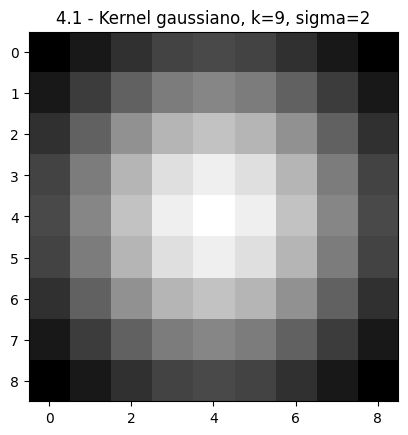

In [152]:
imshow(k9)
title('4.1 - Kernel gaussiano, k=9, sigma=2')

In [16]:
def noise_redux_gaussian(img,kr,sigma):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape
    
    #kernel shape and fill with 1/k_size (average)
    kernel = kernel_build(kr,sigma)

    #start new image
    imgT=np.zeros((w+p*2,h+p*2))
    

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #multiply image and kernel matrix
                aux=np.multiply(kernel,neigh)
                #sum result
                imgT[i,j]=sum(aux)
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

#fazer com mudança do sigma

In [147]:
imn3_1=noise_redux_gaussian(h_gaussian8,3,1)
imn3_4=noise_redux_gaussian(h_gaussian8,5,2)
imn3_5=noise_redux_gaussian(h_gaussian8,9,2)

Text(0.5, 1.0, '4.4-Gauss: k:9, S:2')

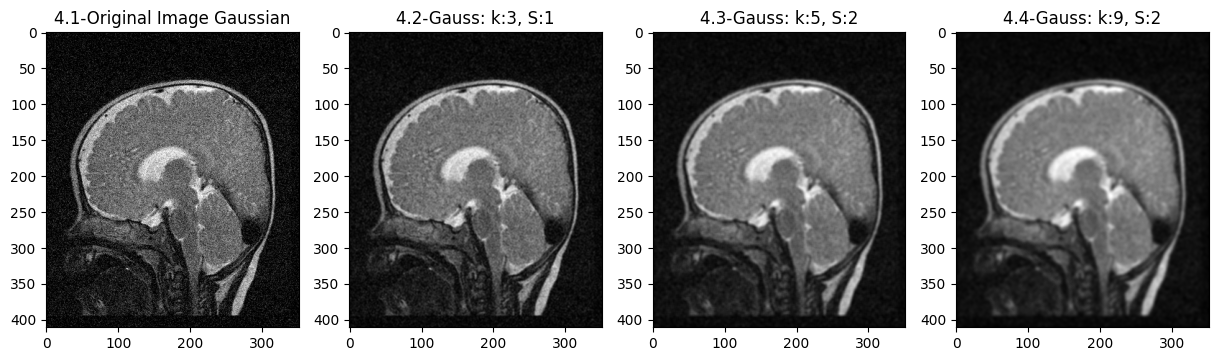

In [154]:
fig, (img1, img3, img4, img5)=matplotlib.pylab.subplots(1,4,figsize=(15,20))
img1.imshow(h_gaussian)
img1.set_title('4.1-Original Image Gaussian', fontsize=12)
img3.imshow(imn3_1)
img3.set_title('4.2-Gauss: k:3, S:1', fontsize=12)
img4.imshow(imn3_4)
img4.set_title('4.3-Gauss: k:5, S:2', fontsize=12)
img5.imshow(imn3_5)
img5.set_title('4.4-Gauss: k:9, S:2', fontsize=12)

Através da utilização do filtro gaussiano, há uma ponderação da influência dos píxeis vizinhos na suavização da imagem, tendo em conta a sua proximidade ao ponto-alvo. A imagem 4.0 demonstra a influência pesada dos píxeis vizinhos em relação ao ponto-alvo (centro).
Nas imagens 4.2 a 4.4 verifica-se que quanto maior o kernel e o sigma, maior será a suavização da imagem. No caso da imagem 4.4 há uma suavização excessiva devido ao aumento do sigma e do kernel.

**Question 5**: Detect the edges of the image "head_clean.png" using the sobel filter. It should present the results for the derivatives for each direction, as well as the final result.

In [19]:
kr_vertical=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(kr_vertical)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [20]:
kr_horiz=kr_vertical.transpose()
print(kr_horiz)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [21]:
def edge_detect_sobel(img,kr,kernel):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape
    
    #start new image
    imgT=np.zeros((w+p*2,h+p*2))
    

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #multiply image and kernel matrix
                aux=np.multiply(kernel,neigh)
                #sum result
                imgT[i,j]=sum(aux)
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

In [22]:
im_sobel1=edge_detect_sobel(h_clean,3,kr_vertical)
im_sobel2=edge_detect_sobel(h_clean,3,kr_horiz)

In [23]:
def edge_detect_sobel_final(img_vert,img_horz):
    
    #Não efetuada passagem de filtro passa-baixo pois a imagem já é 'clean'
    (w,h)=img_vert.shape
    
    imgT=np.zeros((w,h))

    dx2=np.square(img_vert)
    dy2=np.square(img_horz)
    sumb=np.add(dx2,dy2)
    imgT=np.sqrt(sumb)
    
    return imgT        

In [24]:
#imagem final
sob=edge_detect_sobel_final(im_sobel1,im_sobel2)

Text(0.5, 1.0, '5.4-Final')

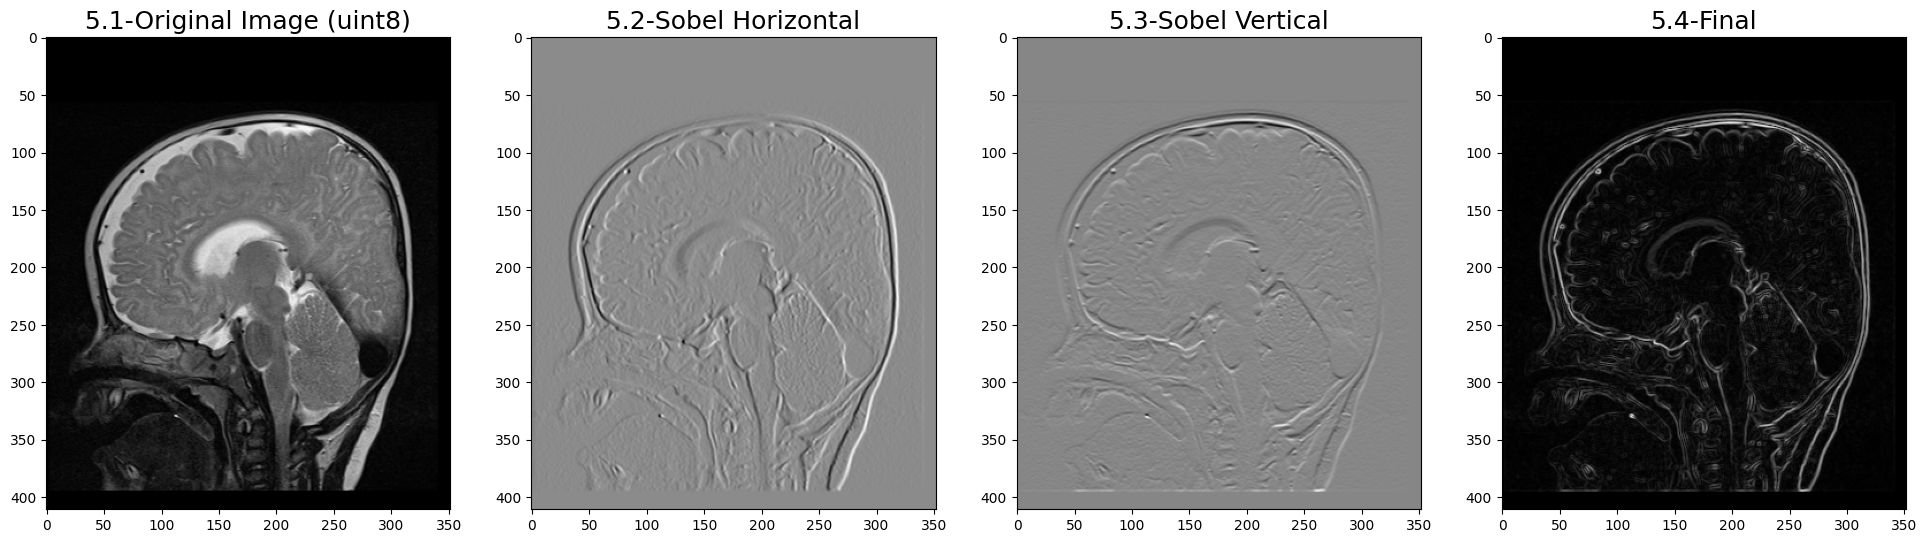

In [158]:
fig, (img1, img2, img3, img4)=matplotlib.pylab.subplots(1,4,figsize=(24,20))
img1.imshow(h_clean)
img1.set_title('5.1-Original Image (uint8)', fontsize=18)
img2.imshow(im_sobel1)
img2.set_title('5.2-Sobel Horizontal', fontsize=18)
img3.imshow(im_sobel2)
img3.set_title('5.3-Sobel Vertical', fontsize=18)
img4.imshow(sob)
img4.set_title('5.4-Final', fontsize=18)

**Question 6**: Faça a deteção dos contornos da imagem "head_clean.png" usando o filtro de laplaciano.

In [27]:
kr_laplace=np.array([[0,1,0],[1,-4,1],[0,1,0]])
print(kr_laplace)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


In [28]:
im_laplace=edge_detect_sobel(h_clean8,3,kr_laplace)

Text(0.5, 1.0, '6 - Deteção de contornos com filtro laplaciano')

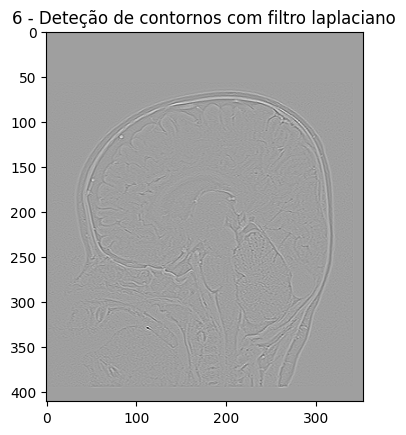

In [159]:
imshow(im_laplace)
title('6 - Deteção de contornos com filtro laplaciano')

**Question 7**: Replique o algoritmo de enhancement apresentado nas aulas. O algoritmo deve ser aplicado à imagem "skeleton_orig.tif". 